In [125]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [126]:
with open("../data/ltr-training-data.json") as file:
    raw_data = json.load(file)
    for idx, query in enumerate(raw_data):
        features = {item['name']: item['value'] for item in query['features']}
        raw_data[idx] = {**query, **features}
    df = pd.DataFrame(raw_data)

In [127]:
df['queryId'] = pd.factorize(df['searchTerm'])[0]

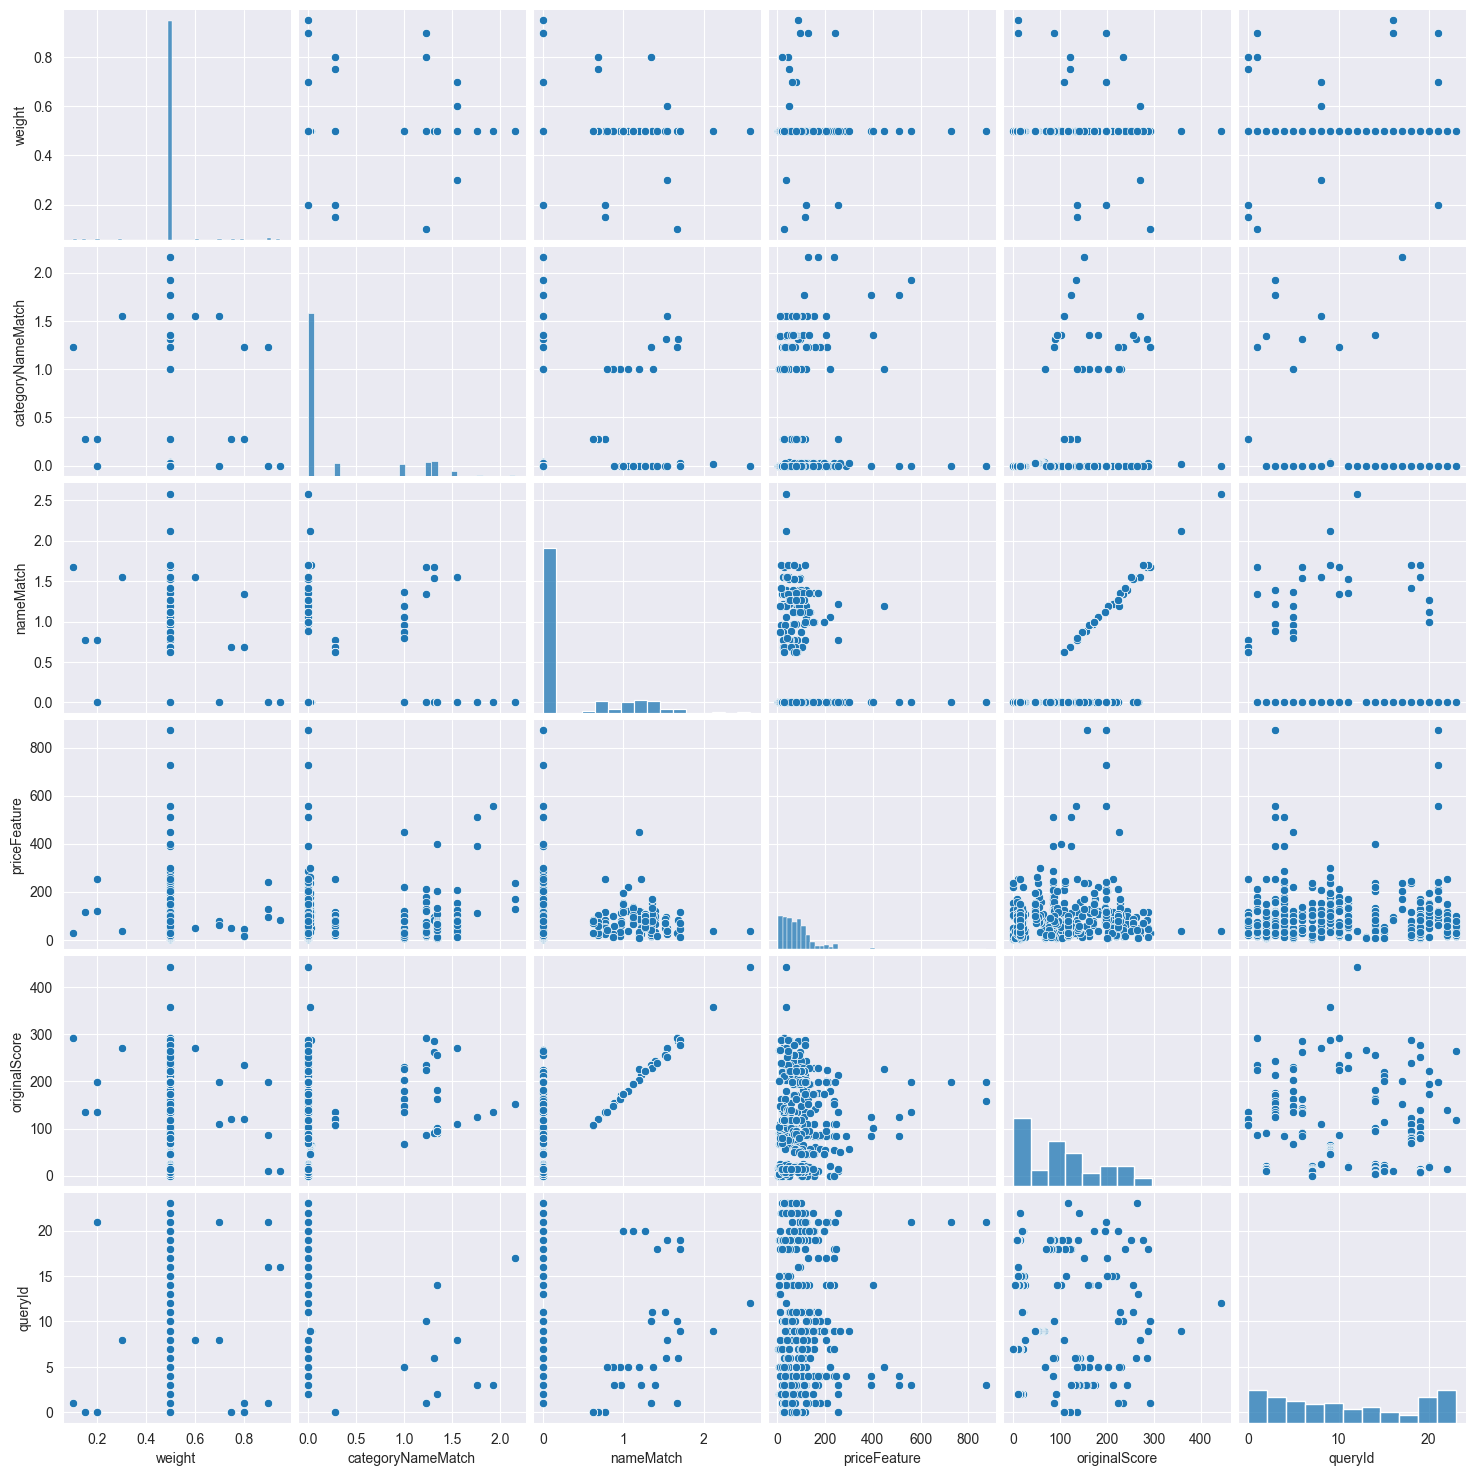

In [128]:
sns.pairplot(df)

In [129]:
display(df)

,searchTerm,productCode,weight,features,categoryNameMatch,nameMatch,priceFeature,originalScore,queryId
0,drill,3887529,0.50,"[{'name': 'categoryNameMatch', 'value': 0.2764...",0.276477,0.773474,81.0,135.358020,0
1,drill,3887483,0.15,"[{'name': 'categoryNameMatch', 'value': 0.2764...",0.276477,0.773474,116.0,135.358020,0
2,drill,3887477,0.20,"[{'name': 'categoryNameMatch', 'value': 0.2764...",0.276477,0.773474,254.0,135.358020,0
3,drill,3887475,0.50,"[{'name': 'categoryNameMatch', 'value': 0.2764...",0.276477,0.773474,32.0,135.358020,0
4,drill,3884646,0.50,"[{'name': 'categoryNameMatch', 'value': 0.2764...",0.276477,0.773474,70.0,135.358020,0
...,...,...,...,...,...,...,...,...,...
520,einhell,3880517,0.50,"[{'name': 'categoryNameMatch', 'value': 0.0}, ...",0.000000,0.000000,64.0,117.957535,23
521,einhell,3880504,0.50,"[{'name': 'categoryNameMatch', 'value': 0.0}, ...",0.000000,0.000000,42.0,117.957535,23
522,einhell,3879445,0.50,"[{'name': 'categoryNameMatch', 'value': 0.0}, ...",0.000000,0.000000,59.0,117.957535,23
523,einhell,3879444,0.50,"[{'name': 'categoryNameMatch', 'value': 0.0}, ...",0.000000,0.000000,79.0,117.957535,23


array([[<Axes: title={'center': 'weight'}>]], dtype=object)

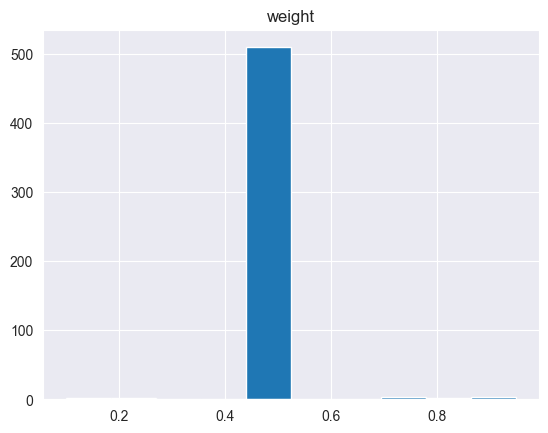

In [130]:
df.hist(column='weight')

In [131]:
query_counts = df['queryId'].value_counts()
valid_query_ids = query_counts[query_counts > 1].index
df = df[df['queryId'].isin(valid_query_ids)]

In [132]:
conditions = [
    df['weight'] < 0.33,
    df['weight'] < 0.66
]
choices = [0, 1]

# Assign new column
df.loc[:, 'label'] = np.select(conditions, choices, default=2)
df.loc[:, 'label'] = df['label'].astype(int)

/var/folders/zp/g4vl8rc9547d39lfkn5zs0dw0000gn/T/ipykernel_17911/2951191189.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'label'] = np.select(conditions, choices, default=2)


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524 entries, 0 to 524
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   searchTerm         524 non-null    object 
 1   productCode        524 non-null    object 
 2   weight             524 non-null    float64
 3   features           524 non-null    object 
 4   categoryNameMatch  524 non-null    float64
 5   nameMatch          524 non-null    float64
 6   priceFeature       524 non-null    float64
 7   originalScore      524 non-null    float64
 8   queryId            524 non-null    int64  
 9   label              524 non-null    int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 45.0+ KB


In [134]:
display(df)

,searchTerm,productCode,weight,features,categoryNameMatch,nameMatch,priceFeature,originalScore,queryId,label
0,drill,3887529,0.50,"[{'name': 'categoryNameMatch', 'value': 0.2764...",0.276477,0.773474,81.0,135.358020,0,1
1,drill,3887483,0.15,"[{'name': 'categoryNameMatch', 'value': 0.2764...",0.276477,0.773474,116.0,135.358020,0,0
2,drill,3887477,0.20,"[{'name': 'categoryNameMatch', 'value': 0.2764...",0.276477,0.773474,254.0,135.358020,0,0
3,drill,3887475,0.50,"[{'name': 'categoryNameMatch', 'value': 0.2764...",0.276477,0.773474,32.0,135.358020,0,1
4,drill,3884646,0.50,"[{'name': 'categoryNameMatch', 'value': 0.2764...",0.276477,0.773474,70.0,135.358020,0,1
...,...,...,...,...,...,...,...,...,...,...
520,einhell,3880517,0.50,"[{'name': 'categoryNameMatch', 'value': 0.0}, ...",0.000000,0.000000,64.0,117.957535,23,1
521,einhell,3880504,0.50,"[{'name': 'categoryNameMatch', 'value': 0.0}, ...",0.000000,0.000000,42.0,117.957535,23,1
522,einhell,3879445,0.50,"[{'name': 'categoryNameMatch', 'value': 0.0}, ...",0.000000,0.000000,59.0,117.957535,23,1
523,einhell,3879444,0.50,"[{'name': 'categoryNameMatch', 'value': 0.0}, ...",0.000000,0.000000,79.0,117.957535,23,1


In [135]:
X = df.drop(columns=['searchTerm', 'productCode', 'weight', 'features', 'label'])
y = df['label']
assert len(X) == len(y)

In [136]:
from sklearn.model_selection import train_test_split

# Optional: split into train/test (use same query groups!)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42, stratify=df['queryId'])

X_train = X_train.sort_values(by=['queryId'])
X_test = X_test.sort_values(by=['queryId'])

group_train = X_train.groupby("queryId").size().to_list()
group_test = X_test.groupby("queryId").size().to_list()

assert sum(group_train) == len(X_train), f"Group sum {sum(group_train)} not equal  nrows {len(X_train)}"

In [137]:
y_train.value_counts()

label
1    460
2      9
0      2
Name: count, dtype: int64

In [138]:
X_train = X_train.drop(columns=['queryId'])
X_test = X_test.drop(columns=['queryId'])

In [139]:
import lightgbm as lgb

train_data = lgb.Dataset(X_train, label=y_train, group=group_train)

params = {
    'objective': 'lambdarank',
    'metric': 'ndcg',
    'ndcg_eval_at': [1, 3],
    'learning_rate': 0.1,
    'num_leaves': 5,
    'min_data_in_leaf': 1,
}

model = lgb.train(params, train_data, num_boost_round=100)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 186
[LightGBM] [Info] Number of data points in the train set: 471, number of used features: 4


In [140]:
model.dump_model()

{'name': 'tree',
 'version': 'v4',
 'num_class': 1,
 'num_tree_per_iteration': 1,
 'label_index': 0,
 'max_feature_idx': 3,
 'objective': 'lambdarank',
 'average_output': False,
 'feature_names': ['categoryNameMatch',
  'nameMatch',
  'priceFeature',
  'originalScore'],
 'monotone_constraints': [],
 'feature_infos': {'categoryNameMatch': {'min_value': 0,
   'max_value': 2.1623287,
   'values': []},
  'nameMatch': {'min_value': 0, 'max_value': 2.1228883, 'values': []},
  'priceFeature': {'min_value': 4, 'max_value': 872, 'values': []},
  'originalScore': {'min_value': 0.13610649,
   'max_value': 358.2374,
   'values': []}},
 'tree_info': [{'tree_index': 0,
   'num_leaves': 5,
   'num_cat': 0,
   'shrinkage': 0.1,
   'tree_structure': {'split_index': 0,
    'split_feature': 1,
    'split_gain': 1.656849980354309,
    'threshold': 0.9831299250000002,
    'decision_type': '<=',
    'default_left': True,
    'missing_type': 'None',
    'internal_value': 3.09362e-09,
    'internal_weight': 2

In [141]:
pred = model.predict(data=X_test)
print("Len pred", len(pred))
print("Len X_test", len(X_test))
print(pred)

Len pred 53
Len X_test 53
[-3.34040944 -1.01744498 -5.37288388 -1.69432696  0.66012309  1.3521599
 -2.58447022 -2.734517    0.61844083 -5.31224666 -2.04148356 -2.93732655
 -2.93732655 -3.12311729 -6.82201143 -0.95098313  0.38016787  0.47895421
 -3.12311729 -3.96487463 -5.31009449 -2.06994546 -2.89223039 -2.94347947
  0.82414355 -2.75768873 -2.19105041 -1.69432696 -2.94347947  0.82414355
 -2.94347947 -4.64760793 -2.2272743  -3.11948809 -2.94347947 -1.01744498
  0.35682412 -2.72834399 -0.68898231 -5.09012591 -2.94347947 -2.94347947
 -6.82201143 -5.91400026 -6.82201143 -2.2272743  -2.04148356 -2.94347947
  1.42730939 -2.58447022 -1.01744498 -1.78842987  0.32398336]


In [142]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = df.drop(columns=['searchTerm', 'productCode', 'weight', 'features', 'label'])
y = df['weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
results = X_test.copy()
results['true_relevance'] = y_test
results['predicted_score'] = y_pred

mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

display(results)



MSE:  0.007442638835885115


,categoryNameMatch,nameMatch,priceFeature,originalScore,queryId,true_relevance,predicted_score
311,0.000000,0.000000,8.0,266.000400,13,0.5,0.500000
441,0.000000,0.991625,195.0,173.534410,20,0.5,0.500000
6,0.276477,0.773474,29.0,135.358020,0,0.5,0.500000
184,1.316941,0.000000,85.0,89.990944,6,0.5,0.500000
78,0.000000,1.389368,120.0,243.139340,3,0.5,0.470000
407,0.000000,0.000000,109.0,8.038113,19,0.5,0.500000
524,0.000000,0.000000,30.0,117.957535,23,0.5,0.500000
487,0.000000,0.000000,26.0,14.714725,22,0.5,0.500000
117,0.000000,0.000000,137.0,84.709000,4,0.5,0.500000
137,1.004762,1.364029,99.0,231.127200,5,0.5,0.500000
